In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk
from nltk.corpus import stopwords
#Downloading nltk data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/train.csv')



In [97]:
print(train.shape, test.shape)

(20800, 5) (20800, 5)


In [98]:
print(train.iloc[5][1])

Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart


In [99]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [100]:
test=test.fillna(' ')
train=train.fillna(' ')
test['combineData']=test['title']+' '+test['author']+test['text']
train['combineData']=train['title']+' '+train['author']+train['text']

#Creating Wordcloud Visuals

In [101]:
real_words = ''
fake_words = ''
stoplist = stopwords.words('english')
  

# iterate through the csv file 
for val in train[train['label']==1].combineData: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

for val in train[train['label']==0].combineData: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words+= " ".join(tokens)+" "

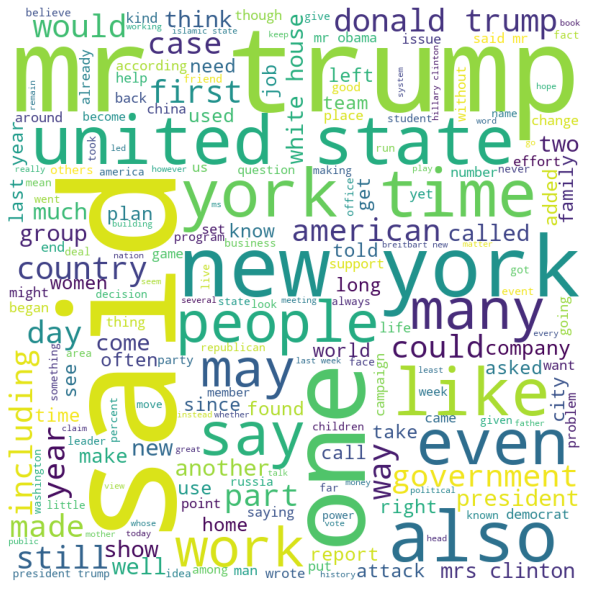

In [102]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stoplist, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#Cleaning and preprocessing

# 1.Regex

In [103]:
str="N#########o$%^&w #$%^&*th#$%^&*(is is g@#$%^&*oin#$%^&*(g to  b#$%^&*(e n#$%^&*(ew@#$%^&*(s d#$%^&*(ete#$%^&*(cti#$%^&*(ve "
str=re.sub(r'[^\w\s]','',str)
print(str)

Now this is going to  be news detective 


#2. Tokenization

In [104]:
nltk.word_tokenize("hey This is real News ")

['hey', 'This', 'is', 'real', 'News']

# 3. StopWords

In [105]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [106]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [107]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [108]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

#4. Lemmatization

In [109]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

# wordnet contain data regarding of lemmatizer 
nltk.download('wordnet')
input_str="been had done languages cities mice"

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


#Let's Apply

In [111]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['combineData']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + lemmatizer.lemmatize(word).lower()
        
    train.loc[index,'combineData'] = filter_sentence

In [112]:
train=train.rename(columns={'total':'combineData'})

In [113]:
train

,id,title,author,text,label,combineData
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper ti trump poster child for white suprem...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,nfl playoffs schedule matchups odds the new y...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,macys is said receive takeover approach hudso...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia to hold parallel exercises in bal...


#Applying NLP Techniques

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
X_train=train['combineData']
Y_train=train['label']

In [116]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X = vectorizer.transform(X_train)

In [117]:
print(X)

  (0, 193339)	0.014251723682766018
  (0, 192918)	0.04798814005493949
  (0, 192788)	0.009513835689569556
  (0, 191427)	0.0432193826821374
  (0, 191415)	0.06964967740813574
  (0, 191271)	0.036826985685343996
  (0, 191184)	0.012957237699274633
  (0, 190482)	0.016032396829821688
  (0, 190280)	0.05870983669845154
  (0, 189112)	0.014844805453674404
  (0, 189028)	0.02060588499044508
  (0, 188795)	0.01669874420805987
  (0, 188537)	0.012190788273372785
  (0, 188393)	0.032903159599635246
  (0, 188266)	0.05870983669845154
  (0, 188009)	0.02334413943504067
  (0, 187910)	0.011531559308095725
  (0, 186479)	0.02785428676690503
  (0, 186446)	0.02107578335112647
  (0, 186373)	0.016565700636845072
  (0, 184878)	0.02107578335112647
  (0, 182981)	0.0643241498956477
  (0, 182075)	0.05649521247745022
  (0, 181755)	0.03386580341770357
  (0, 181390)	0.01712755096818207
  :	:
  (20799, 11097)	0.020369382803188407
  (20799, 11093)	0.02579193802780123
  (20799, 11007)	0.030318786434671566
  (20799, 10917)	0.0380

#Modelling

In [118]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, random_state=0,test_size=0.20)

#Logistic Regression

In [119]:
print(X_train)

  (0, 193412)	0.04673687951133794
  (0, 192788)	0.009942899069280343
  (0, 191271)	0.07697568334013855
  (0, 191155)	0.05192121382847615
  (0, 190430)	0.03508801122511513
  (0, 189243)	0.017471408545357163
  (0, 189028)	0.04307037484740582
  (0, 188918)	0.021926433792490693
  (0, 188886)	0.0408990988914679
  (0, 188186)	0.020918780464870675
  (0, 187910)	0.0361548593184723
  (0, 187662)	0.021492826568182164
  (0, 187310)	0.015986153186104933
  (0, 187282)	0.0657644743027547
  (0, 187093)	0.01972479305066551
  (0, 186446)	0.02202627767641745
  (0, 186373)	0.017312795261394287
  (0, 185201)	0.018138395505324693
  (0, 184878)	0.0440525553528349
  (0, 183714)	0.02231856165616089
  (0, 183711)	0.027498928197857972
  (0, 182557)	0.060160959602941655
  (0, 182338)	0.040704806760220924
  (0, 181787)	0.03319178999278811
  (0, 180442)	0.03435407276329459
  :	:
  (16639, 40236)	0.049502376307212076
  (16639, 37800)	0.02892684517811856
  (16639, 34146)	0.0528509034223825
  (16639, 32790)	0.0366640

In [120]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logit classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logit classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logit classifier on training set: 1.00
Accuracy of Logit classifier on test set: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[1993,   53],
       [  37, 2077]])

#MultinomialNB

In [121]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.83


array([[2039,    7],
       [ 681, 1433]])

In [122]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['combineData']
Y_train = train['label']

In [123]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
pipeline = Pipeline([
  ('vect', TfidfVectorizer()),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [125]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [126]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0])

In [127]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [128]:
# filename = './pipeline.sav'

#giviing the path of filename 
filename='/content/pipeline.sav'

#Prediction

In [129]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]
